In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Introduction

For this challenge, we are going to use the same New York City weather data we have used in previous challenges, but this time, instead of using the daily data, we will use hourly. For our outcome variable, we will take the hourly precipitation and create a binary variable out of it so we can predict if it is going to rain in any given hour.

In [5]:
# Weather data from 2014 – mid November 2018
nyc_weather = pd.read_csv("1557522.csv", low_memory=False)

### Clean the Data

For this exercise, we only want to pull the hourly weather data from the dataset.

In [6]:
# we only want the hourly data and the date from this
nyc_weather.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

In [7]:
hourly = nyc_weather[['DATE', 'HOURLYVISIBILITY',
       'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF', 'HOURLYDewPointTempF',
       'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting']]

# everything needs to be numeric, so let's see what's there
hourly.dtypes

DATE                       object
HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF        float64
HOURLYDewPointTempF        object
HOURLYRelativeHumidity    float64
HOURLYWindSpeed           float64
HOURLYStationPressure      object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

### Create the binary variable

Based on the datatypes above, we need to switch a lot of the columns to be numeric. After that, we will pull out the binary raining variable.

In [12]:
# change date to date 
hourly.loc[:,'DATE'] = pd.to_datetime(hourly['DATE'])

# extract the hour
hourly.loc[:,'HOUR'] = pd.DatetimeIndex(hourly['DATE']).hour

# convert everything to numeric
hourly.loc[:,'HOURLYVISIBILITY'] = pd.to_numeric(hourly['HOURLYDRYBULBTEMPF'], errors='coerce')
hourly.loc[:,'HOURLYDRYBULBTEMPF'] = pd.to_numeric(hourly['HOURLYDRYBULBTEMPF'], errors='coerce')
hourly.loc[:,'HOURLYDewPointTempF'] = pd.to_numeric(hourly['HOURLYDewPointTempF'], errors='coerce')
hourly.loc[:,'HOURLYStationPressure'] = pd.to_numeric(hourly['HOURLYStationPressure'], errors='coerce')
hourly.loc[:,'HOURLYPrecip'] = pd.to_numeric(hourly['HOURLYPrecip'], errors='coerce')
hourly.loc[:,'HOURLYAltimeterSetting'] = pd.to_numeric(hourly['HOURLYAltimeterSetting'], errors='coerce')

# Create a categorical variable of if it is raining or not
hourly.loc[:,'RAIN'] = np.where(hourly.loc[:,'HOURLYPrecip']>0, 1, 0)

print(hourly.dtypes)

hourly.head(2)

DATE                      datetime64[ns]
HOURLYVISIBILITY                 float64
HOURLYDRYBULBTEMPF               float64
HOURLYWETBULBTEMPF               float64
HOURLYDewPointTempF              float64
HOURLYRelativeHumidity           float64
HOURLYWindSpeed                  float64
HOURLYStationPressure            float64
HOURLYPrecip                     float64
HOURLYAltimeterSetting           float64
HOUR                               int64
RAIN                               int64
dtype: object


,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOUR,RAIN
0,2014-01-01 00:51:00,25.0,25.0,20.0,6.0,44.0,3.0,30.13,0.0,30.30,0,0
1,2014-01-01 01:51:00,25.0,25.0,20.0,5.0,42.0,9.0,30.16,0.0,30.33,1,0


In [9]:
hourly.describe().dropna()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOUR,RAIN
count,54883.000000,54883.000000,54282.000000,54873.000000,54882.000000,49916.000000,54254.000000,44539.000000,54303.000000,56668.000000,56668.000000
mean,55.954357,55.954357,50.167201,43.516228,66.221402,5.158566,29.867669,0.011372,30.037026,11.734471,0.126385
std,17.596915,17.596915,16.194111,19.481487,20.573848,3.730380,0.232375,0.051101,0.233419,7.090666,0.332286
min,-1.000000,-1.000000,-2.000000,-19.000000,9.000000,0.000000,28.780000,0.000000,28.940000,0.000000,0.000000
25%,42.000000,42.000000,38.000000,29.000000,50.000000,3.000000,29.720000,0.000000,29.890000,6.000000,0.000000
50%,57.000000,57.000000,52.000000,46.000000,66.000000,5.000000,29.870000,0.000000,30.040000,12.000000,0.000000
75%,71.000000,71.000000,64.000000,60.000000,86.000000,7.000000,30.010000,0.000000,30.180000,18.000000,0.000000
max,96.000000,96.000000,82.000000,79.000000,100.000000,28.000000,30.680000,1.690000,30.850000,23.000000,1.000000


In [16]:
print(len(hourly.loc[hourly['RAIN']==1]))
print(len(hourly.loc[hourly['RAIN']==0]))

7162
49506


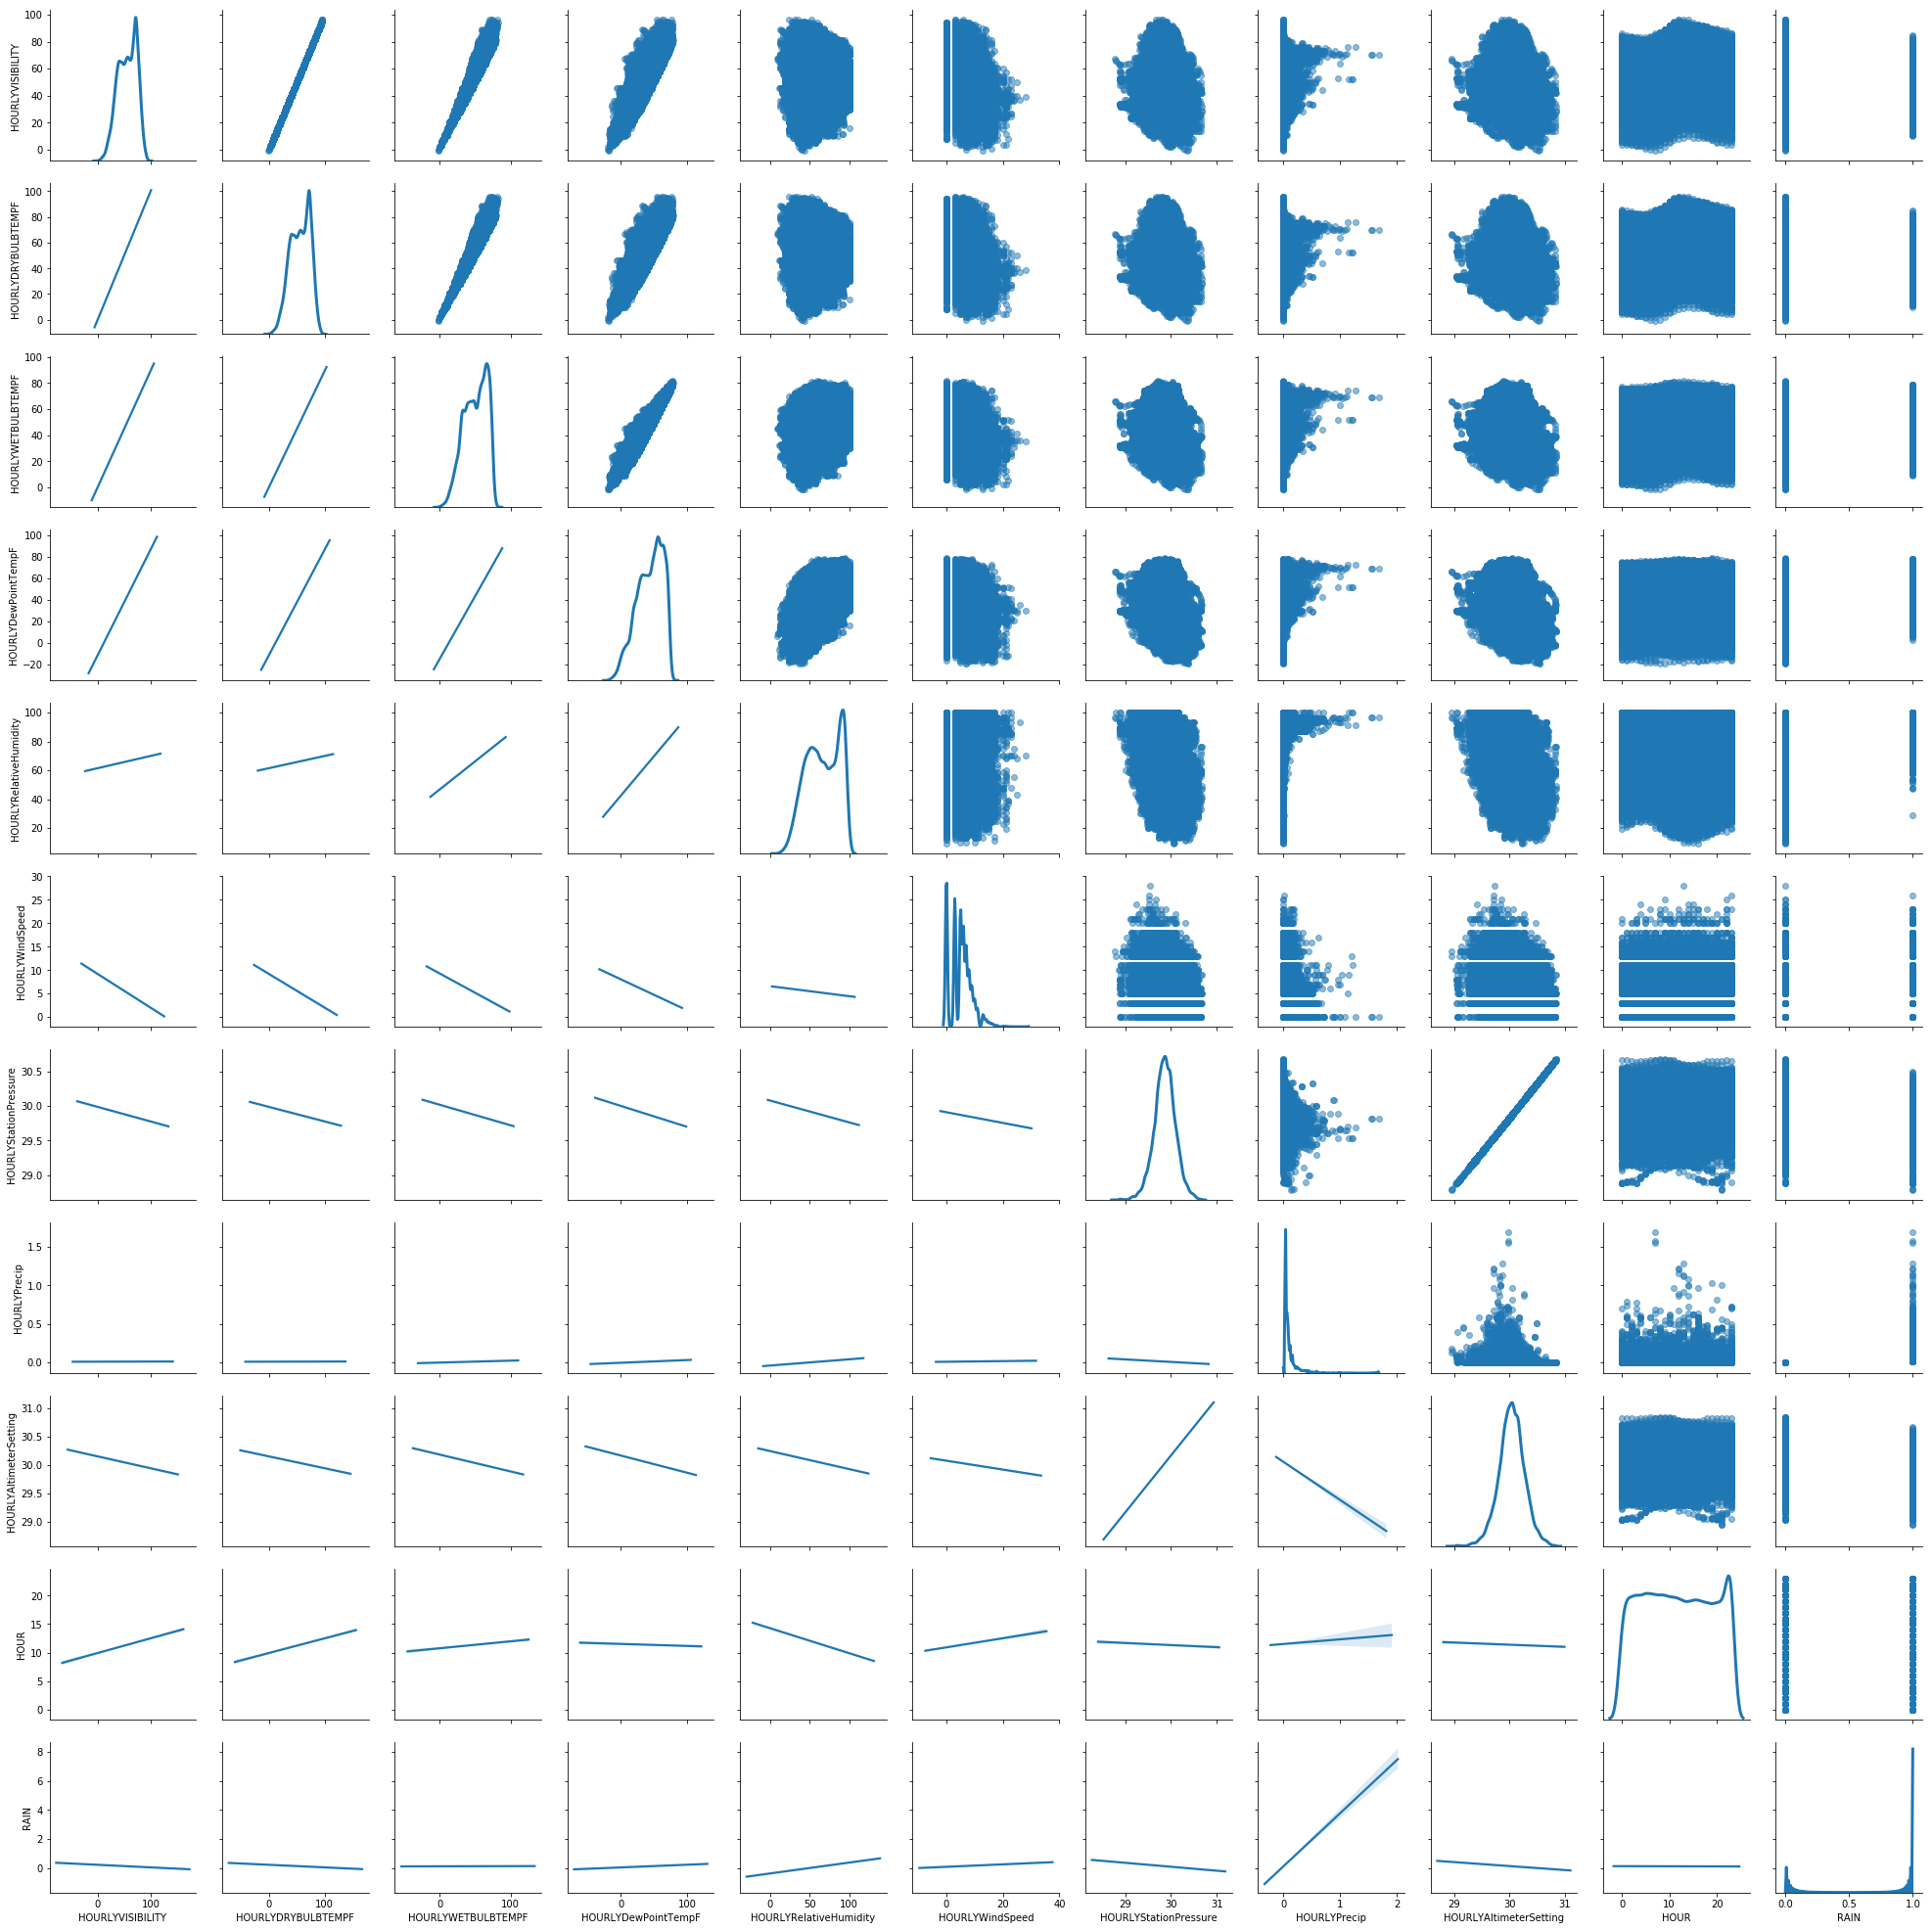

In [13]:
g = sns.PairGrid(hourly, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

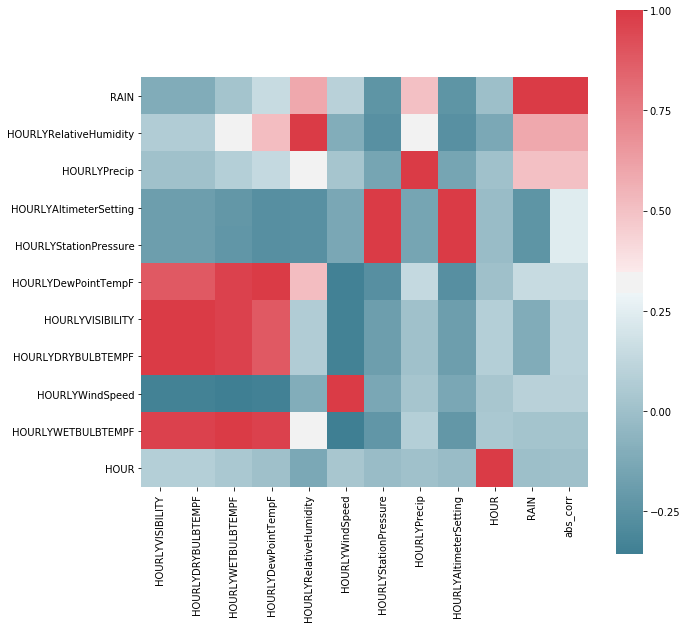

In [17]:
hourly = hourly.dropna()

# sort corr map by Rain

corrmat = hourly.corr()
corrmat["abs_corr"] = abs(corrmat['RAIN'])
corrmat = corrmat.sort_values("abs_corr", ascending=False)
corrmat
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, square=True, cmap=cmap)
plt.show()

In [18]:
hourly.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'HOUR', 'RAIN'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
features = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
            'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
            'HOURLYStationPressure', 'HOURLYAltimeterSetting', 'HOUR']

# Separating out the features
x = hourly.loc[:, features].values
# Separating out the target
y = hourly.loc[:,['RAIN']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2'])

In [21]:
hourly_ = pd.concat([principalDf, hourly], axis = 1).dropna().reset_index()
hourly_.head().dropna()

,index,pc1,pc2,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOUR,RAIN
0,0,3.795699,-0.885637,2014-01-01 00:51:00,25.0,25.0,20.0,6.0,44.0,3.0,30.13,0.0,30.30,0.0,0.0
1,1,4.184905,-0.580789,2014-01-01 01:51:00,25.0,25.0,20.0,5.0,42.0,9.0,30.16,0.0,30.33,1.0,0.0
2,2,4.236082,-0.628030,2014-01-01 02:51:00,24.0,24.0,19.0,6.0,46.0,9.0,30.18,0.0,30.35,2.0,0.0
3,3,4.249060,-0.686137,2014-01-01 03:51:00,24.0,24.0,19.0,6.0,46.0,9.0,30.19,0.0,30.36,3.0,0.0
4,4,3.737765,-1.469151,2014-01-01 04:51:00,24.0,24.0,20.0,7.0,48.0,0.0,30.20,0.0,30.37,4.0,0.0


### Feature Selection

Let's run SelectKBest to see which features will work best in the model.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

# pull out the features
features = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
            'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
            'HOURLYStationPressure', 'HOURLYAltimeterSetting', 'HOUR', 'pc1','pc2']

X = hourly_.loc[:,features]
y = hourly_.loc[:,['RAIN']]

#split out a training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# place results into a dataframe
selector=SelectKBest(score_func=f_classif, k=11)
selector.fit(x_train,y_train)
scores = pd.DataFrame()
scores["Attribute"] = features
scores["F Score"] = selector.scores_
scores["P Value"] = selector.pvalues_
scores["Support"] = selector.get_support()

scores.sort_values(by=['F Score'], ascending=False)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attribute,F Score,P Value,Support
4,HOURLYRelativeHumidity,12836.363778,0.000000e+00,True
7,HOURLYAltimeterSetting,1220.813913,1.217610e-260,True
6,HOURLYStationPressure,1216.170920,1.105759e-259,True
3,HOURLYDewPointTempF,513.464006,1.917337e-112,True
0,HOURLYVISIBILITY,302.490879,2.553770e-67,True
1,HOURLYDRYBULBTEMPF,302.490879,2.553770e-67,True
5,HOURLYWindSpeed,252.487860,1.492578e-56,True
10,pc2,26.433793,2.749659e-07,True
9,pc1,8.562528,3.434889e-03,True
2,HOURLYWETBULBTEMPF,4.828320,2.800585e-02,True


### Create the Decision Tree

It looks as if only the top 3 features would be of any use to us in the model, with humidity being far and away the most useful. Every other features P Value is much too high.

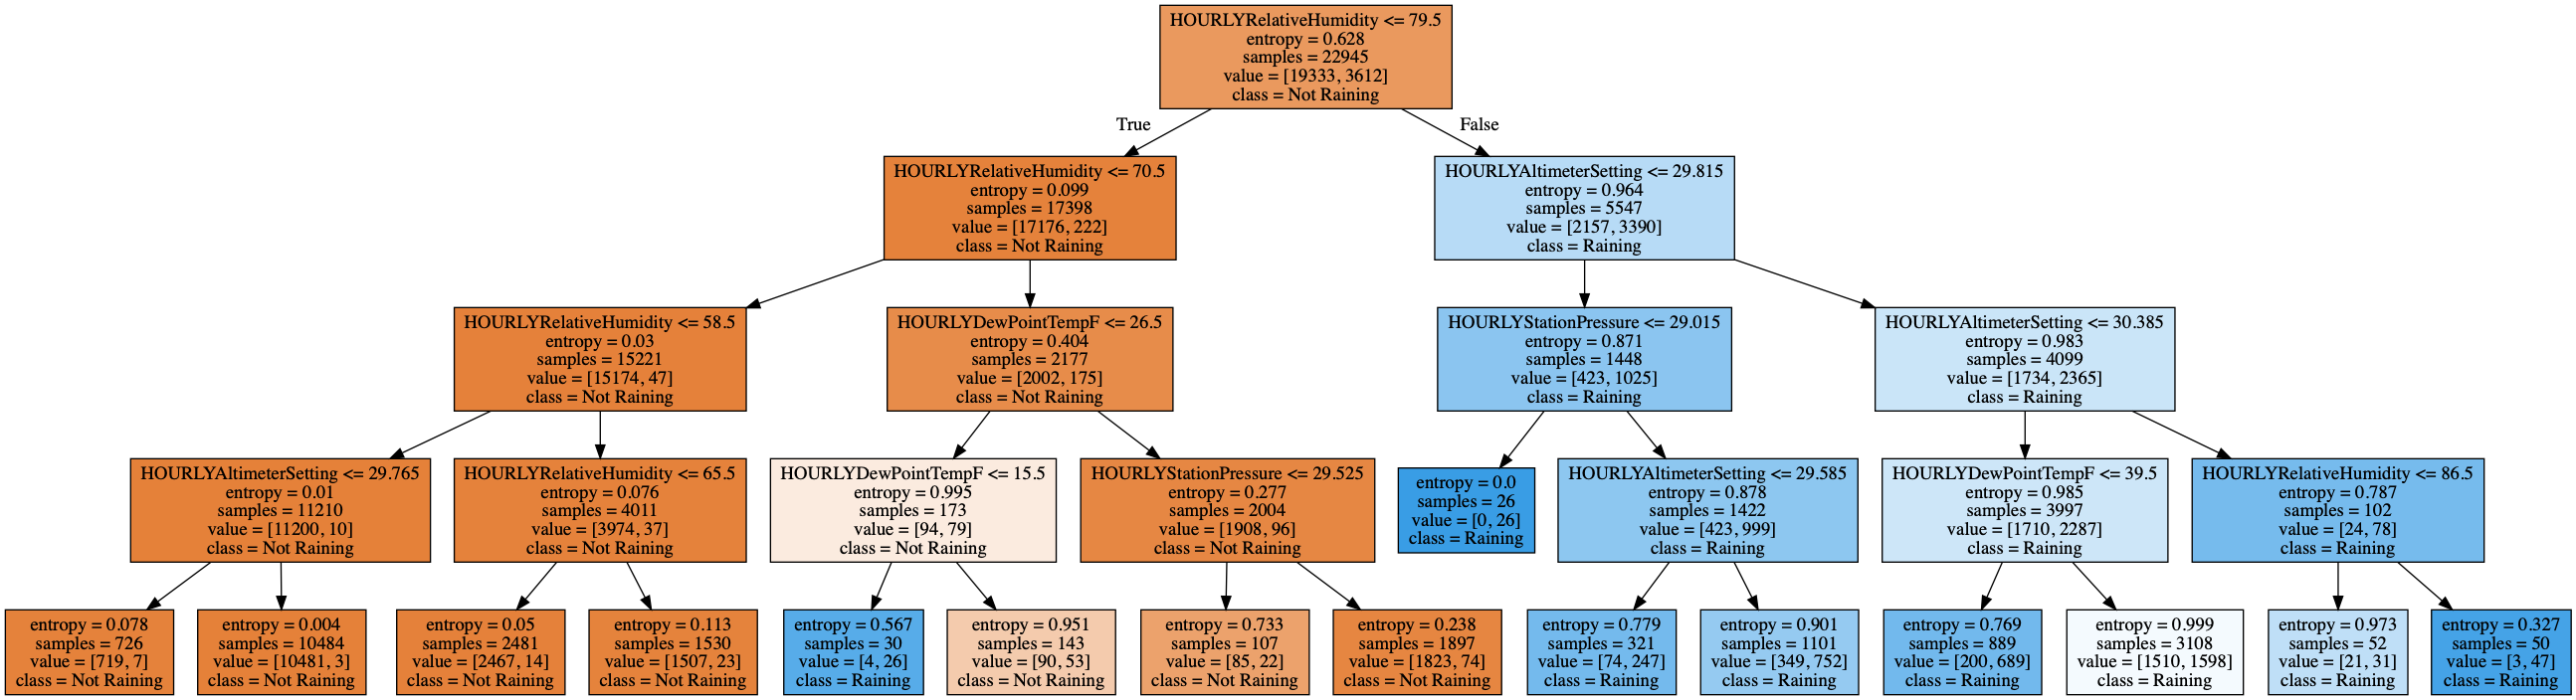

In [31]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

x_train = x_train.loc[:,['HOURLYRelativeHumidity', 'HOURLYAltimeterSetting', 'HOURLYStationPressure', 'HOURLYDewPointTempF']]
x_test = x_test.loc[:,['HOURLYRelativeHumidity', 'HOURLYAltimeterSetting', 'HOURLYStationPressure', 'HOURLYDewPointTempF']]

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1000
)
decision_tree.fit(x_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=x_train.columns,
    class_names=['Not Raining', 'Raining'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Test against Random Forest

Now that we have built out the decision tree, let's see how the model performs against the random forest model.

In [46]:
from sklearn.model_selection import cross_val_score
from datetime import datetime
start_time = datetime.now()
cross_tree = cross_val_score(decision_tree, x_test, y_test, cv=10)
print('\nCross Validation Score:')
print(cross_tree)

print('\nMean Cross Validation Score:')
print(cross_tree.mean())

print('\nCross Validation Score Standard Deviation:')
print(cross_tree.std())

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Cross Validation Score:
[0.90469974 0.89686684 0.9073107  0.8694517  0.90849673 0.92408377
 0.92015707 0.90445026 0.90968586 0.88874346]

Mean Cross Validation Score:
0.9033946132597549

Cross Validation Score Standard Deviation:
0.014839729940722723

Duration: 0:00:00.046191


In [48]:
from sklearn import ensemble
from datetime import datetime

import warnings
warnings.filterwarnings(action="ignore", module="sklearn")

start_time = datetime.now()

rfc = ensemble.RandomForestClassifier(n_estimators=100)

# X = hourly[['HOURLYRelativeHumidity', 'HOURLYAltimeterSetting', 'HOURLYStationPressure']]
# y = hourly['RAIN']
rfc.fit(x_train, y_train)
cross_forest = cross_val_score(rfc, x_test, y_test, cv=10)
print('\nCross Validation Score:')
print(cross_forest)

print('\nMean Cross Validation Score:')
print(cross_forest.mean())

print('\nCross Validation Score Standard Deviation:')
print(cross_forest.std())

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



Cross Validation Score:
[0.91775457 0.91644909 0.93342037 0.91383812 0.94509804 0.92931937
 0.93062827 0.92801047 0.93062827 0.91753927]

Mean Cross Validation Score:
0.9262685834658114

Cross Validation Score Standard Deviation:
0.00925029727400795

Duration: 0:00:04.951203


In [52]:
from sklearn.metrics import classification_report
print('Decision Tree Classification Report:')
print(classification_report(y_test, decision_tree.predict(x_test)))

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, rfc.predict(x_test)))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      6445
         1.0       0.61      0.94      0.74      1204

   micro avg       0.90      0.90      0.90      7649
   macro avg       0.80      0.91      0.84      7649
weighted avg       0.93      0.90      0.90      7649


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6445
         1.0       0.78      0.79      0.79      1204

   micro avg       0.93      0.93      0.93      7649
   macro avg       0.87      0.88      0.87      7649
weighted avg       0.93      0.93      0.93      7649



In [51]:
from sklearn.metrics import accuracy_score
print('Decision Tree Accuracy Score:')
print(accuracy_score(y_test, decision_tree.predict(x_test)))

print('\nRandom Forest Accuracy Score:')
print(accuracy_score(y_test, rfc.predict(x_test)))

Decision Tree Accuracy Score:
0.8967185252974245

Random Forest Accuracy Score:
0.9317557850699438


### Conclusion

After running both the decision tree and the random forest model, you can see that the random forest model is much more consistent in predicting the outcome than the decision tree. This is of course at the cost of a runtime of nearly 5 seconds, but when it comes down to a nearly 20% swing in accuracy of it predicting if it is raining or not, and a 33% difference in the precision & recall on the decision tree, I would say that 5 seconds is more than worth it.